In [0]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [0]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 4318393592769993752, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 1285604246494020521
 physical_device_desc: "device: XLA_CPU device"]

In [0]:
import tensorflow as tf
tf.test.gpu_device_name()

''

In [0]:
import os
os.chdir('/content/drive/My Drive/Colab_Kullanimi/')
!ls

a			 hs_err_pid7949.log   tree.dot
CinsiyetTanima		 hs_err_pid8352.log   tree.png
hs_err_pid7274.log	 model_lstm_plot.png  YazarTanima
hs_err_pid7274.log.gdoc  model_plot.png       zemberek-full.jar


In [0]:
!pip install tensorflow==1.14.0
!pip install -q keras
!pip install scikit-learn

In [0]:
from glob import glob
headers = []
label_list = []

for index, file in enumerate(glob('CinsiyetTanima/**/*.txt', recursive=True)): 
    label_list.append(file.split("/")[-2]),
    headers.append((open(file, encoding="ISO-8859-9", 
    errors='ignore').read().replace('\n', ' ').strip().lower()))      

print("haber  :  ", len(headers))
print("label  :  ", len(label_list))

haber  :   43292
label  :   43292


In [0]:
print("toplam veri sayısı : ",len(label_list))


value1 = [i for i in label_list if i in '0']
value2 = [i for i in label_list if i in '1']

print("0.sınıf : ",len(value1))
print("1.sınıf : ",len(value2))

toplam veri sayısı :  43292
0.sınıf :  21646
1.sınıf :  21646


In [0]:
print(headers[1])

türkiyede 20 bin kişi ata biniyor kayıtlı sporcu 500ü geçmiyor   17 mart 2012    - equist at ve binicilik fuarı 13-15 nisan 2012de i̇stanbul fuar merkezinde açılıyor. marmara üniversitesi i̇letişim fakültesini bitirdikten sonra kısa süre gazetecilik yapan i̇lker altun, uzun süre geçenlerde vefat eden uluslararası nakliyeciler derneği (und) ile roderin kurucusu saffet ulusoya danışmanlık görevini yürüttü. ardından lojistik sektörüne dönük yayıncılık şirketi kurup, yola koyuldu. lojistik sektöründeki bağlantıları onu sınıf arkadaşı merih güngörle birlikte eko fuarcılıkı kurmaya yönlendirdi. eko fuarcılık, ilk iş olarak lojistik sektörüne dönük fuar düzenleme yoluna gitti. i̇lker altun, bir yandan eşi selma altunla birlikte işlerini büyütürken diğer taraftan şekerpınarda çiftlik evi yapmak  üzere aldığı arsayı iddialı bir at çiftliğine dönüştürdü. gelen mesaj üzerine i̇lker altunu aradım: - at ve binicilik fuarı da nereden çıktı? daha önce böyle bir fuar düzenlenmiş miydi türk

In [0]:
import nltk 

for i in range(len(headers)):
   
    headers[i] = headers[i].lower() 
    headers[i] = headers[i].split() 
    


In [0]:

import nltk
nltk.download("stopwords")  
from nltk.corpus import stopwords



def removeStopWords(headers):
    
    filtered_stopwords = []
    filtered_stopwords_number = []
    
    stop_words = stopwords.words('turkish')
    
    stop_words.append("bir")
    stop_words.append("iki")
    stop_words.append("üç")
    stop_words.append("dört")
    stop_words.append("beş")
    stop_words.append("altı")
    stop_words.append("yedi")
    stop_words.append("sekiz")
    stop_words.append("dokuz")
    stop_words.append("on")
    stop_words.append("ancak")
    stop_words.append("artık")
    stop_words.append("asla")
    stop_words.append("bana")
    stop_words.append("bazen")
    stop_words.append("bazıları")
    stop_words.append("bazısı")
    stop_words.append("ben")
    stop_words.append("beni")
    stop_words.append("benim")
    stop_words.append("bile")
    stop_words.append("böyle")
    stop_words.append("böylece")
    stop_words.append("bütün")
    stop_words.append("burada")
    stop_words.append("bunun")
    stop_words.append("bunu")
    stop_words.append("çoğu")
    stop_words.append("çoğuna")
    stop_words.append("çoğunu")
    stop_words.append("değil")
    stop_words.append("demek")
    stop_words.append("diğer")
    stop_words.append("dolayı")
    stop_words.append("elbette")
    stop_words.append("madem")
    stop_words.append("nesi")
    stop_words.append("zaten")
    stop_words.append("zira")
    stop_words.append("yoksa")
    stop_words.append("yine")
    stop_words.append("yerine")
    stop_words.append("veyahut")
    stop_words.append("var")
    stop_words.append("üzere")
    stop_words.append("tamam")
    stop_words.append("tümü")
    stop_words.append("tabi")
    stop_words.append("rağmen")
    stop_words.append("oysa")
    stop_words.append("oysaki")
    stop_words.append("orada")
    stop_words.append("öbürü")
    stop_words.append("önce")
    stop_words.append("içinde")
    stop_words.append("işte")
    stop_words.append("gene")
    stop_words.append("falan")
    stop_words.append("felan")
    stop_words.append("filan")
    stop_words.append("fakat")
    stop_words.append("hala")
    stop_words.append("hangi")
    stop_words.append("hangisi")
    stop_words.append("hani")
    stop_words.append("hatta")
    stop_words.append("henüz")
    stop_words.append("hepsine")
    stop_words.append("hepsini")
    stop_words.append("herkes")
    stop_words.append("hiçbiri")
    
    
    
    
    print("stop_words : ",stop_words)



    for i in headers:
        filtered_sentence = [w for w in i if not w in stop_words]
                            
        filtered_stopwords.append(" ".join(filtered_sentence))                  
    
    return filtered_stopwords,filtered_stopwords_number                                       


headers,filtered_stopwords_number = removeStopWords(headers)
#print(headers[0])
                            

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
stop_words :  ['acaba', 'ama', 'aslında', 'az', 'bazı', 'belki', 'biri', 'birkaç', 'birşey', 'biz', 'bu', 'çok', 'çünkü', 'da', 'daha', 'de', 'defa', 'diye', 'eğer', 'en', 'gibi', 'hem', 'hep', 'hepsi', 'her', 'hiç', 'için', 'ile', 'ise', 'kez', 'ki', 'kim', 'mı', 'mu', 'mü', 'nasıl', 'ne', 'neden', 'nerde', 'nerede', 'nereye', 'niçin', 'niye', 'o', 'sanki', 'şey', 'siz', 'şu', 'tüm', 've', 'veya', 'ya', 'yani', 'bir', 'iki', 'üç', 'dört', 'beş', 'altı', 'yedi', 'sekiz', 'dokuz', 'on', 'ancak', 'artık', 'asla', 'bana', 'bazen', 'bazıları', 'bazısı', 'ben', 'beni', 'benim', 'bile', 'böyle', 'böylece', 'bütün', 'burada', 'bunun', 'bunu', 'çoğu', 'çoğuna', 'çoğunu', 'değil', 'demek', 'diğer', 'dolayı', 'elbette', 'madem', 'nesi', 'zaten', 'zira', 'yoksa', 'yine', 'yerine', 'veyahut', 'var', 'üzere', 'tamam', 'tümü', 'tabi', 'rağmen', 'oysa', 'oysaki', 'orada', 'öbürü', 'ö

In [0]:
import numpy as np
import re
for i in range(len(headers)):
  
    headers[i] = re.sub(r'[0-9]'," ",headers[i])
    headers[i] = re.sub(r'[.,x?!<=>&*%+^“/”):-;‘’"’(]'," ", headers[i])
    

print(headers[1])

türkiyede    bin kişi ata biniyor kayıtlı sporcu    ü geçmiyor    mart      - equist at binicilik fuarı   -   nisan     de i̇stanbul fuar merkezinde açılıyor  marmara üniversitesi i̇letişim fakültesini bitirdikten sonra kısa süre gazetecilik yapan i̇lker altun  uzun süre geçenlerde vefat eden uluslararası nakliyeciler derneği  und  roderin kurucusu saffet ulusoya danışmanlık görevini yürüttü  ardından lojistik sektörüne dönük yayıncılık şirketi kurup  yola koyuldu  lojistik sektöründeki bağlantıları onu sınıf arkadaşı merih güngörle birlikte eko fuarcılıkı kurmaya yönlendirdi  eko fuarcılık  ilk iş olarak lojistik sektörüne dönük fuar düzenleme yoluna gitti  i̇lker altun  yandan eşi selma altunla birlikte işlerini büyütürken taraftan şekerpınarda çiftlik evi yapmak aldığı arsayı iddialı at çiftliğine dönüştürdü  gelen mesaj üzerine i̇lker altunu aradım  - at binicilik fuarı nereden çıktı  fuar düzenlenmiş miydi türkiyede  soruma telefonda yanıt vermek yüz yüze anlatmayı se

In [0]:
!pip install JPype1

In [0]:
from os.path import join
from jpype import JClass, JString, getDefaultJVMPath, shutdownJVM, startJVM, java


ZEMBEREK_PATH = 'zemberek-full.jar'
startJVM(getDefaultJVMPath(), '-ea', '-Djava.class.path=%s' % (ZEMBEREK_PATH))

/usr/local/lib/python3.6/dist-packages/jpype/_core.py:209: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)


In [0]:
TurkishMorphology = JClass('zemberek.morphology.TurkishMorphology')
Paths = JClass('java.nio.file.Paths')
morphology = TurkishMorphology.createWithDefaults()

In [0]:
from typing import List
TurkishMorphology: JClass = JClass('zemberek.morphology.TurkishMorphology')

morphology: TurkishMorphology = TurkishMorphology.createWithDefaults()

    
for i in range(len(headers)):
    
    sentence: str = headers[i]
    
    analysis: java.util.ArrayList = (
        morphology.analyzeAndDisambiguate(sentence).bestAnalysis()
        )

    pos: List[str] = []

    for j, analysis in enumerate(analysis, start=1):
        #print(
        f'\nAnalysis {j}: {analysis}',
        f'\nPrimary POS {j}: {analysis.getPos()}'
        f'\nPrimary POS (Short Form) {j}: {analysis.getPos().shortForm}'
            #)
        pos.append(
        f'{str(analysis.getLemmas()[0])}'
            #f'-{analysis.getPos().shortForm}'
                )
    f'\nFull sentence with POS tags: {" ".join(pos)}'
    headers[i] = pos

In [0]:
print(headers[1])

['türkiye', 'bin', 'kişi', 'ata', 'bin', 'kayıt', 'spor', 'UNK', 'UNK', 'geç', 'mart', '-', 'UNK', 'at', 'bin', 'fuar', '-', 'nisan', 'UNK', 'de', 'UNK', 'fuar', 'merkez', 'aç', 'marmara', 'üniversitesi', 'UNK', 'fakülte', 'bitir', 'sonra', 'kısa', 'süre', 'gazete', 'yap', 'UNK', 'altun', 'uzun', 'süre', 'geçenlerde', 'vefat', 'et', 'uluslararası', 'nakliye', 'dernek', 'und', 'roder', 'kur', 'saffet', 'ulusoy', 'danışman', 'görev', 'yürü', 'ardından', 'lojistik', 'sektör', 'dönük', 'yayın', 'şirket', 'kur', 'yol', 'koy', 'lojistik', 'sektör', 'bağlantı', 'o', 'sınıf', 'arkadaş', 'merih', 'güngör', 'birlikte', 'eko', 'fuarcılık', 'kurmay', 'yönlen', 'eko', 'fuarcılık', 'ilk', 'iş', 'ol', 'lojistik', 'sektör', 'dönük', 'fuar', 'düzenle', 'yol', 'git', 'UNK', 'altun', 'yan', 'eş', 'selma', 'altun', 'birlikte', 'iş', 'büyüt', 'taraf', 'şekerpınar', 'çiftlik', 'ev', 'yap', 'al', 'arsa', 'iddia', 'at', 'çiftlik', 'dönüş', 'gel', 'mesaj', 'üzeri', 'UNK', 'altun', 'ara', '-', 'at', 'bin', 'fua

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import  accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.naive_bayes import MultinomialNB

multinomial_bayes = Pipeline([
    ('vect',TfidfVectorizer(lowercase=False, use_idf=True)),
    ('multinomial_bayes', MultinomialNB())
    ])


In [0]:


headers_new = []
label_list_new = []
for s in headers:
    headers_new.append(str(s))


print(len(headers_new))
for s in label_list:
    label_list_new.append(str(s))

43292


In [0]:
seed = 7
np.random.seed(seed)

accuracies_test = []
accuracies_train = []
precision_value_train = []
precision_value_test = []
recall_value_train = []
recall_value_test = []
conf_matrix_list_of_arrays = []

headers_new = np.array(headers_new)
label_list_new = np.array(label_list_new)


In [0]:
import warnings
warnings.filterwarnings("ignore")


from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10)

for train, test in skf.split(headers_new, label_list_new):
  X_train, X_test = headers_new[train], headers_new[test]
  y_train, y_test = label_list_new[train], label_list_new[test]

  model = multinomial_bayes.fit(X_train,y_train) 
  labels = model.predict(X_test)



  #Prediction
  YX_predict = model.predict(X_train)

  #Accuracy
  accuracy_test = accuracy_score(y_test, labels)
  #Put all accuricies in array to calculate mean accuracy
  accuracies_test.append(accuracy_test)
  #Accuracy
  accuracy_train = accuracy_score(y_train, YX_predict)
  #Put all accuricies in array to calculate mean accuracy
  accuracies_train.append(accuracy_train) 


  precision_test = precision_score(y_test, labels, average='macro')
  precision_value_test.append(precision_test)
  precision_train = precision_score(y_train, YX_predict, average='macro')
  precision_value_train.append(precision_train)
  recall_train = recall_score(y_train, YX_predict, average='macro')
  recall_value_train.append(recall_train)
  recall_test = recall_score(y_test, labels, average='macro')
  recall_value_test.append(recall_test)


  conf_matrix = confusion_matrix(y_test, labels)
  conf_matrix_list_of_arrays .append(conf_matrix)



print("Bayes Train Accuracy: ", np.mean(accuracies_train))
print("Bayes Test Accuracy: ",np.mean(accuracies_test))
print("Bayes Train Precision: ",np.mean(precision_value_train))
print("Bayes Test Precision: ",np.mean(precision_value_test))
print("Bayes Train Recall : ",np.mean(recall_value_train))
print("Bayes Test Recall : ",np.mean(recall_value_test))
confision_matrix = np.mean(conf_matrix_list_of_arrays, axis=0)


Bayes Train Recall :  0.8509937740120421
Bayes Test Recall :  0.8293679910182581


In [0]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

sns.heatmap(confision_matrix/np.sum(confision_matrix), annot=True, fmt='.2%', cmap='OrRd')

plt.xlabel('true label')
plt.ylabel('predicted label')


In [0]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.ensemble import RandomForestClassifier

random_forest = Pipeline([
        ('vect',TfidfVectorizer(lowercase=False, use_idf=True)),
        ('RandomForestClassifier', RandomForestClassifier(n_estimators=100))
        ])

In [0]:
headers_new = np.array(headers_new)
label_list_new = np.array(label_list_new)

accuracies_test2 = []
accuracies_train2 = []
precision_value_train2 = []
precision_value_test2 = []
recall_value_train2 = []
recall_value_test2 = []
conf_matrix_list_of_arrays2 = []


In [0]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import  accuracy_score, confusion_matrix


from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10)

for train, test in skf.split(headers_new, label_list_new):
  X_train, X_test = headers_new[train], headers_new[test]
  y_train, y_test = label_list_new[train], label_list_new[test]

  model = random_forest.fit(X_train,y_train)
  labels = model.predict(X_test)



  YX_predict = model.predict(X_train)

  #Accuracy
  accuracy_test2 = accuracy_score(y_test, labels)
  #Put all accuricies in array to calculate mean accuracy
  accuracies_test2.append(accuracy_test2)
  #Accuracy
  accuracy_train2 = accuracy_score(y_train, YX_predict)
  #Put all accuricies in array to calculate mean accuracy
  accuracies_train2.append(accuracy_train2) 

  
  precision_test = precision_score(y_test, labels, average='macro')
  precision_value_test2.append(precision_test)
  precision_train = precision_score(y_train, YX_predict, average='macro')
  precision_value_train2.append(precision_train)
  recall_train = recall_score(y_train, YX_predict, average='macro')
  recall_value_train2.append(recall_train)
  recall_test = recall_score(y_test, labels, average='macro')
  recall_value_test2.append(recall_test)

  conf_matrix = confusion_matrix(y_test, labels)
  conf_matrix_list_of_arrays2 .append(conf_matrix)



print("Random Forest Train Accuracy: ", np.mean(accuracies_train2))
print("Random Forest Test Accuracy: ",np.mean(accuracies_test2))
print("Random Forest Train Prescision : ",np.mean(precision_value_train2))
print("Random Forest Test Prescision : ",np.mean(precision_value_test2))
print("Random Forest Train Recall: ",np.mean(recall_value_train2))
print("Random Forest Test Recall: ",np.mean(recall_value_test2))

In [0]:
confisionMatrix = np.mean(conf_matrix_list_of_arrays2, axis=0)

Text(33.0, 0.5, 'predicted label')

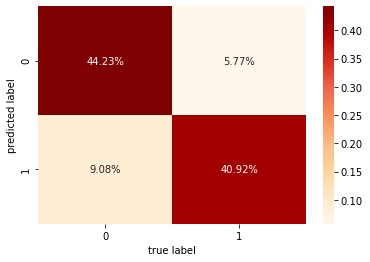

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

sns.heatmap(confisionMatrix/np.sum(confisionMatrix),
            annot=True, fmt='.2%', cmap='OrRd')

plt.xlabel('true label')
plt.ylabel('predicted label')